## -------------------------------- *Udemy_Course (Online Course Business)* --------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------

# (1-2) Definition, Problems, and Goals

------------------------------------------------------------------------------------------------------------------------------------------------------

### Definition

Machine Learning ini merupakan salah satu model untuk menentukan sukses tidak nya suatu course yang akan dibuka oleh suatu Lembaga Pendidikan atau dalam problem ini ialah MOOC, yang dapat digunakan oleh perusahaan atau lembaga tersebut sebagai bahan pertimbangan dalam me-*release* course baru.

### Problems & Goals

2.1 Problems
- Kualitas Pendidikan Menurun saat diterapkannya Sistem Pendidikan Jarak Jauh berbasis Teknologi (mediaindonesia.com)
- Penurunan partisipan pada Lembaga-lembaga Bimbingan Belajar akibat Covid-19 (sonora.id)
- Kesulitan dalam mencari pekerjaan akibat pandemi covid (kompasiana.com)
- Kesulitan untuk mengetahui course apa yang paling dibutuhkan mereka-mereka yang sedang ingin improving skill (Briyando, Boby.2020)

2.2 Goals
- Membuat model yang dapat memprediksi/mendeteksi sukses tidaknya suatu course yang akan dibuka oleh suatu MOOC dalam mendapatkan subscribers atau partisipan
- Mengetahui variabel apa saja yang dapat mempengaruhi sukses/tidaknya suatu course dalam mendapatkan subscribers atau partisipan

2.3 Limitasi
- Model dapat digunakan oleh seluruh perusahaan berbasis Platform Media Pembelajaran Online / MOOC / Bimbel dan perusahaan sejenis lainnya.
- Model hanya dapat memprediksi persentase sukses atau tidaknya course yang akan dibuka.


# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999
pd.set_option('display.max_colwidth', -1)

%matplotlib inline

------------------------------------------------------------------------------------------------------------------------------------------------------

# (3) Import Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('udemy.csv', parse_dates=['published_timestamp'])
df1 = df.copy()
df1['content_duration'] = round(df1['content_duration'],2)

In [3]:
df1.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-banking-course/,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow Your CA Practice,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and Consultants,https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel 2017,https://www.udemy.com/complete-excel-finance-course-from-beginner-to-pro/,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-profits-trading-options/,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


------------------------------------------------------------------------------------------------------------------------------------------------------

# (4) Cek Missing Value

------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
df1.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

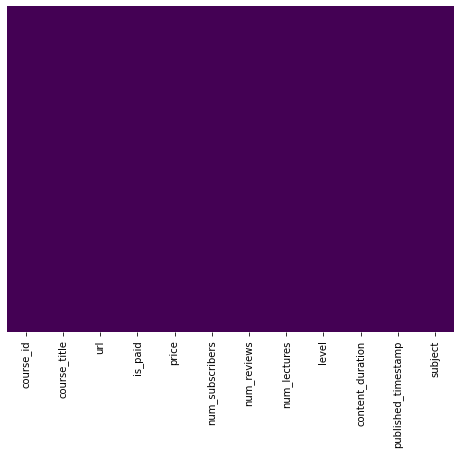

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.isna(), cmap='viridis', yticklabels=False, cbar=False)
plt.show()

- **Tidak terdapat null, sehingga Handling Missing Value tidak perlu dilakukan**

------------------------------------------------------------------------------------------------------------------------------------------------------

# (5) Describe Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [7]:
df1.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### Variabel

- course_id: ID setiap jenis course
- course_title: Nama Course
- url: url dari course_title
- is paid: Tipe Course (Gratis / Berbayar)
- price: Harga course (dalam satuan USD)
- num_subscriber: Jumlah subscriber atau student
- num_reviews: Jumlah subscriber atau partisipan yang memberikan review
- num_lectures: Jumlah instruktur
- level: Level course 
- content_duration: Durasi konten dari satu course nya (dalam satuan hours)
- published_timestamp: Keterangan waktu perilisan course
- subject: Kategori course

Berdasarkan kolom-kolom di atas, belum terdapatnya kolom target (sukses/tidak). Oleh karena itu, kolom target Sukses/Tidak Sukses akan di buat di tahap Feature Engineering berdasarkan Jumlah Subscriber. 

In [8]:
df1.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [9]:
df1.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [10]:
tab_desc1 = df1.describe().T
tab_desc1

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094527,6.053835,0.0,1.0,2.0,4.50,78.5


In [11]:
z = [1,2,3,4,5,6,7,8,8]
np.quantile(z, 0.25)

3.0

In [12]:
tab_desc2 = df1.describe(include='O').T
tab_desc2

,count,unique,top,freq
course_title,3678,3663,Acoustic Blues Guitar Lessons,3
url,3678,3672,https://www.udemy.com/understanding-financial-statements/,2
level,3678,4,All Levels,1929
subject,3678,4,Web Development,1200


In [13]:
dfDesc = []
for i in df1.columns:
    dfDesc.append([
        i,
        df1[i].dtypes,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1)*100),2),
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

In [14]:
tab_desc3 = pd.DataFrame(dfDesc, columns=['Feature','dtypes','null','null%','nunique','sample'])
tab_desc3

,Feature,dtypes,null,null%,nunique,sample
0,course_id,int64,0,0.0,3672,"[53277, 1068986]"
1,course_title,object,0,0.0,3663,"[ExpressJS Fundamentals, Drumming for Beginners - Simple Way To Learn How To Drum]"
2,url,object,0,0.0,3672,"[https://www.udemy.com/guitar-fundamentals-for-beginners/, https://www.udemy.com/making-tax-digital/]"
3,is_paid,bool,0,0.0,2,"[True, False]"
4,price,int64,0,0.0,38,"[25, 95]"
5,num_subscribers,int64,0,0.0,2197,"[1074, 1437]"
6,num_reviews,int64,0,0.0,511,"[56, 418]"
7,num_lectures,int64,0,0.0,229,"[62, 284]"
8,level,object,0,0.0,4,"[Expert Level, Intermediate Level]"
9,content_duration,float64,0,0.0,105,"[42.0, 20.0]"


- Course ID dan Course title tidak sama jumlah nunique nya. Kemungkinan ada satu course title memiliki lebih dari 1 course_id
- Selain itu, jumlah data ialah 3678, sedangkan course_id dan url hanya 3672. **Ada sejumlah data memiliki course_id yang sama (terduplikasi)**

In [15]:
df1.course_title.value_counts().head()

Acoustic Blues Guitar Lessons                                   3
Creating an animated greeting card via Google Slides            3
The Complete Web Developer Masterclass: Beginner To Advanced    2
MicroStation - Células                                          2
Drum Lessons For Beginners                                      2
Name: course_title, dtype: int64

In [16]:
df1[df1.course_title=='Creating an animated greeting card via Google Slides']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1301,692920,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides/,True,20,1504,10,9,Beginner Level,1.5,2016-01-05 20:31:49+00:00,Graphic Design
1334,699376,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides-2/,True,20,549,10,8,Beginner Level,1.0,2016-04-12 01:24:14+00:00,Graphic Design
1447,699380,Creating an animated greeting card via Google Slides,https://www.udemy.com/creating-an-animated-greeting-card-via-google-slides-3/,True,20,770,8,8,Intermediate Level,1.0,2016-05-06 15:54:32+00:00,Graphic Design


In [17]:
id_duplikat = df1.course_id.value_counts().head(6).index # kenapa cuman sampai 6, karena value counts berikutnya cuman 1 setiap course id
index_loc = []
for i in id_duplikat:
    index_loc.append([
        i,
        df1.index[df1.course_id==i]
    ])

In [18]:
tab_desc4 = pd.DataFrame(index_loc, columns=['course_id', 'loc_index'])
tab_desc4

,course_id,loc_index
0,185526,"Int64Index([1234, 1473], dtype='int64')"
1,1084454,"Int64Index([463, 1100], dtype='int64')"
2,837322,"Int64Index([453, 787], dtype='int64')"
3,28295,"Int64Index([2478, 2561], dtype='int64')"
4,1035638,"Int64Index([778, 894], dtype='int64')"
5,1157298,"Int64Index([454, 788], dtype='int64')"


- Setiap course yang sama tersebut akan didrop salah satunya

In [19]:
tab_desc5 = df1[(df1.course_id==185526) | (df1.course_id==1084454)]
tab_desc5

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.50,2017-07-02 14:29:35+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative-methods/,True,40,0,0,35,All Levels,5.50,2017-07-02 14:29:35+00:00,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.62,2014-04-15 21:48:55+00:00,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.62,2014-04-15 21:48:55+00:00,Graphic Design


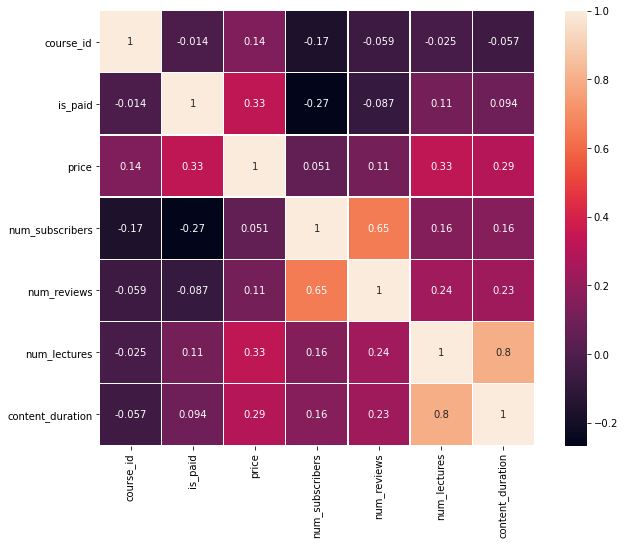

In [20]:
plt.figure(figsize=(11, 8))

sns_plot = sns.heatmap(df1.corr(), annot=True, square=True, linewidths=0.25)
# plt.savefig('heatmap.png')
plt.show()

- Hipotesis awal variabel yang berhubungan dengan **Jumlah Subscribers** berdasarkan nilai korelasi tertinggi

1. Jumlah Reviews
2. Paid or not
3. Content duration
4. Jumlah Lectures